## Importing librairies

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loading_data import *
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
ncg_consumption, gaspool_consumption, the_consumption = read_consumption()
consumption_data = pd.concat([ncg_consumption.add(gaspool_consumption, fill_value=0), the_consumption])
df_consumption = consumption_data.to_frame(name='consumption')

# avoir le premier et le dernier index de la série
start_date = consumption_data.index[0].strftime("%Y-%m-%d")
end_date = consumption_data.index[-1].strftime("%Y-%m-%d")

weather = read_weather()
# afficher les colonnes du dataframe
print(weather.columns)
temp_2m_mean = weather["temperature_2m_mean (°C)"]
temp_2m_mean = temp_2m_mean[start_date:end_date] # avoir les dates des températures maximales à partir de start_date jusqu'à end_date


Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'sunshine_duration (h)',
       'wind_speed_10m_max (km/h)'],
      dtype='object')


In [119]:
temp_2m_mean

Date
2011-04-01    12.7
2011-04-02    14.3
2011-04-03    15.3
2011-04-04    10.6
2011-04-05    10.0
              ... 
2024-10-27    11.6
2024-10-28    11.8
2024-10-29    13.1
2024-10-30    12.9
2024-10-31    11.7
Name: temperature_2m_mean (°C), Length: 4963, dtype: float64

In [97]:
#Conso mensuelle
gas_consumption_monthly = df_consumption.resample('M').sum()
temp_2m_mean_monthly = temp_2m_mean.loc[start_date:end_date].resample('M').mean()


In [98]:
gas_consumption_monthly

,consumption
2011-04-30,3.461649e+07
2011-05-31,3.179633e+07
2011-06-30,2.605131e+07
2011-07-31,2.729786e+07
2011-08-31,2.573426e+07
...,...
2024-06-30,4.282684e+07
2024-07-31,3.910594e+07
2024-08-31,3.715510e+07
2024-09-30,4.464442e+07


In [99]:
consumption_data.corr(temp_2m_mean)

-0.7536698980266934

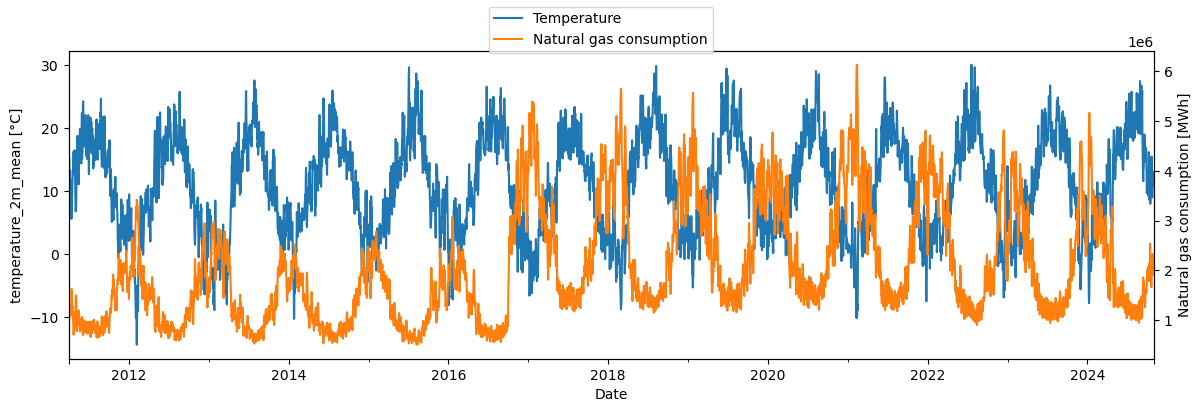

In [100]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

# For both, only show data in 2021 and 2022
temp_2m_mean.loc[start_date:end_date].plot(ax=ax1, color="tab:blue")
consumption_data.plot(ax=ax2, color="tab:orange")

# Labels and legend
ax1.set_ylabel("temperature_2m_mean [°C]")
ax2.set_ylabel("Natural gas consumption [MWh]")

# Legend for both plots in one
fig.legend(
    labels=["Temperature", "Natural gas consumption"],

    loc="upper center",
)

# Create directory if it does not exist
os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/temp_conso_daily.svg", format="svg", bbox_inches="tight")

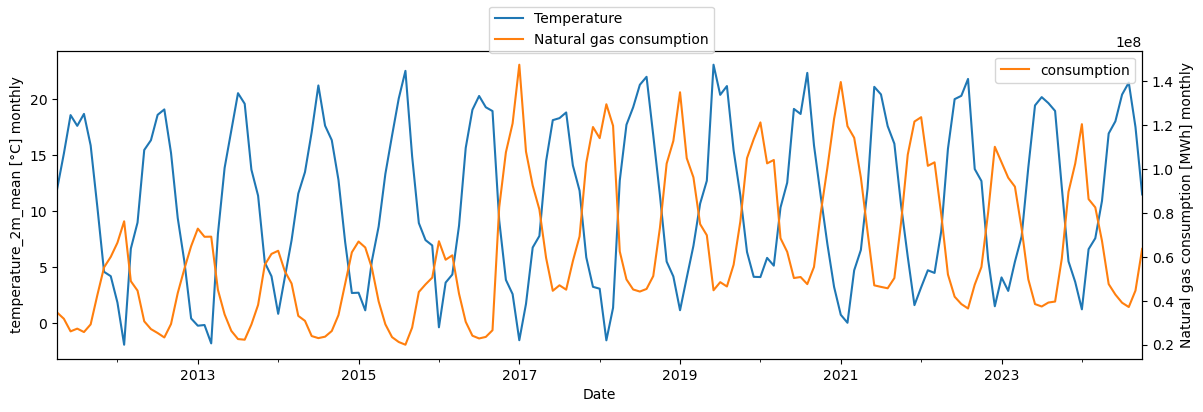

In [101]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

# For both, only show data in 2021 and 2022
temp_2m_mean_monthly.plot(ax=ax1, color="tab:blue")
gas_consumption_monthly.plot(ax=ax2, color="tab:orange")

# Labels and legend
ax1.set_ylabel("temperature_2m_mean [°C] monthly")
ax2.set_ylabel("Natural gas consumption [MWh] monthly")

# Legend for both plots in one
fig.legend(
    labels=["Temperature", "Natural gas consumption"],

    loc="upper center",
)

# Create directory if it does not exist
os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/temp_conso_monthly.svg", format="svg", bbox_inches="tight")

In [102]:
gas_consumption_monthly['consumption'].corr(temp_2m_mean_monthly)

-0.7618906132358104

In [103]:
#Nb d'heures ou 1m2 recoit plus de 120 Watts 
sunshine_dur = weather["sunshine_duration (h)"]
sunshine_dur = sunshine_dur.loc[start_date:end_date]
sunshine_dur

Date
2011-04-01     6.630931
2011-04-02     7.479119
2011-04-03    11.736578
2011-04-04     6.082192
2011-04-05     9.298789
                ...    
2024-10-27     5.493553
2024-10-28     2.000000
2024-10-29     0.000000
2024-10-30     2.199706
2024-10-31     2.540353
Name: sunshine_duration (h), Length: 4963, dtype: float64

In [104]:
consumption_data.corr(sunshine_dur)

-0.49751422900229897

In [105]:
#Nb de secondes ou 1m2 recoit plus de 120 Watts 
wind_speed_10m_max = weather["wind_speed_10m_max (km/h)"]
wind_speed_10m_max = wind_speed_10m_max.loc[start_date:end_date]
wind_speed_10m_max

Date
2011-04-01    25.5
2011-04-02    16.3
2011-04-03    15.8
2011-04-04    16.3
2011-04-05    17.3
              ... 
2024-10-27    22.5
2024-10-28    17.4
2024-10-29    16.4
2024-10-30    18.5
2024-10-31    21.9
Name: wind_speed_10m_max (km/h), Length: 4963, dtype: float64

In [106]:
consumption_data.corr(wind_speed_10m_max)

0.1315934701040311

In [107]:
sunshine_dur_monthly = sunshine_dur.resample('M').sum()
wind_speed_10m_max_monthly = wind_speed_10m_max.resample('M').sum()


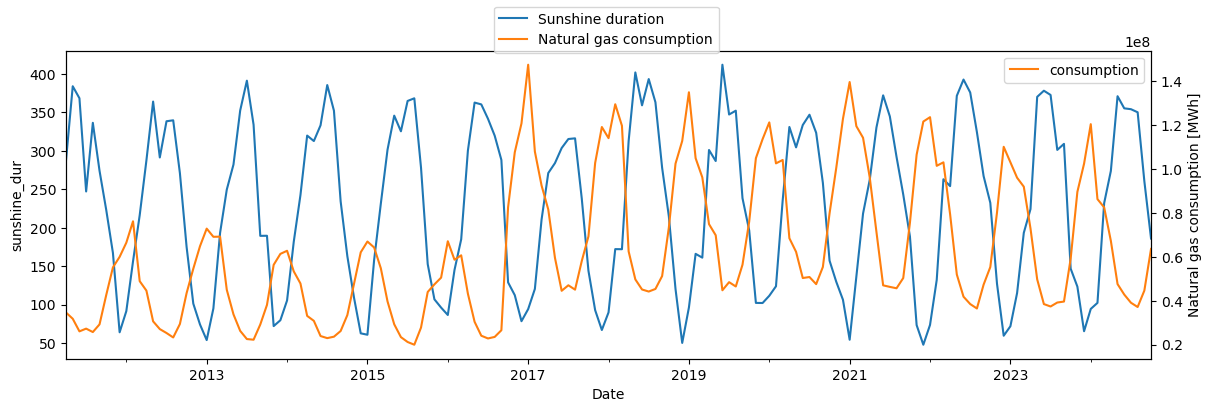

In [108]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

sunshine_dur_monthly.plot(ax=ax1, color="tab:blue")
gas_consumption_monthly.plot(ax=ax2, color="tab:orange")

ax1.set_ylabel("sunshine_dur")
ax2.set_ylabel("Natural gas consumption [MWh]")

fig.legend(
    labels=["Sunshine duration", "Natural gas consumption"],

    loc="upper center",
)

os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/sunshine_duration_analysis.svg", format="svg", bbox_inches="tight")

In [109]:
gas_consumption_monthly['consumption'].corr(sunshine_dur_monthly)

-0.7083587317573444

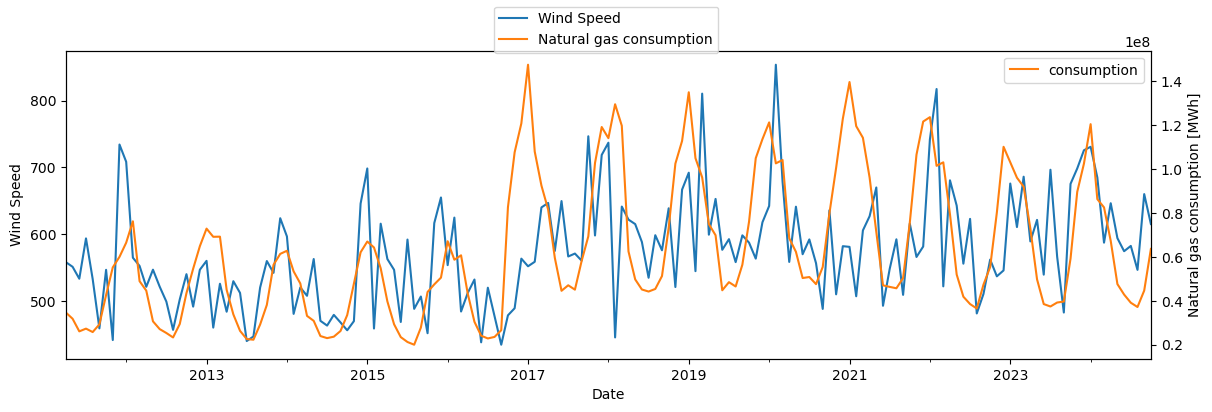

In [110]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

wind_speed_10m_max_monthly.plot(ax=ax1, color="tab:blue")
gas_consumption_monthly.plot(ax=ax2, color="tab:orange")

ax1.set_ylabel("Wind Speed")
ax2.set_ylabel("Natural gas consumption [MWh]")

fig.legend(
    labels=["Wind Speed", "Natural gas consumption"],

    loc="upper center",
)

os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/wind_speed_analysis.svg", format="svg", bbox_inches="tight")

In [111]:
gas_consumption_monthly['consumption'].corr(wind_speed_10m_max_monthly)

0.4679374026173291

## Stationnarity analysis

In [112]:
from statsmodels.tsa.stattools import adfuller

# Fonction pour tester la stationnarité d'une série
def test_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Retourne True si la série est stationnaire

# Fonction pour rendre une série stationnaire
def make_series_stationary(series, max_diff=5):
    diff_count = 0
    while not test_stationarity(series) and diff_count < max_diff:
        series = series.diff()
        diff_count += 1
    return series


In [113]:
#The goal is to see if we can improve the correlation by removing the trending/seasonality effect by making the time series stationnary

#gas_consumption_monthly = gas_consumption_monthly.fillna(method='ffill')
gas_consumption_monthly_st = make_series_stationary(gas_consumption_monthly['consumption'])

#wind_speed_10m_max_monthly = wind_speed_10m_max_monthly.fillna(method='ffill')
wind_speed_10m_max_monthly_st = make_series_stationary(wind_speed_10m_max_monthly)

#sunshine_dur_monthly = sunshine_dur_monthly.fillna(method='ffill')
sunshine_dur_monthly_st = make_series_stationary(sunshine_dur_monthly)


In [114]:
temp_2m_mean_monthly_st = make_series_stationary(temp_2m_mean_monthly)

In [115]:
temp_2m_mean_monthly_st

Date
2011-04-30         NaN
2011-05-31    3.128280
2011-06-30    3.435054
2011-07-31   -0.957634
2011-08-31    1.064516
                ...   
2024-06-30    1.088172
2024-07-31    2.386022
2024-08-31    1.067742
2024-09-30   -3.960430
2024-10-31   -6.013763
Freq: M, Name: temperature_2m_mean (°C), Length: 163, dtype: float64

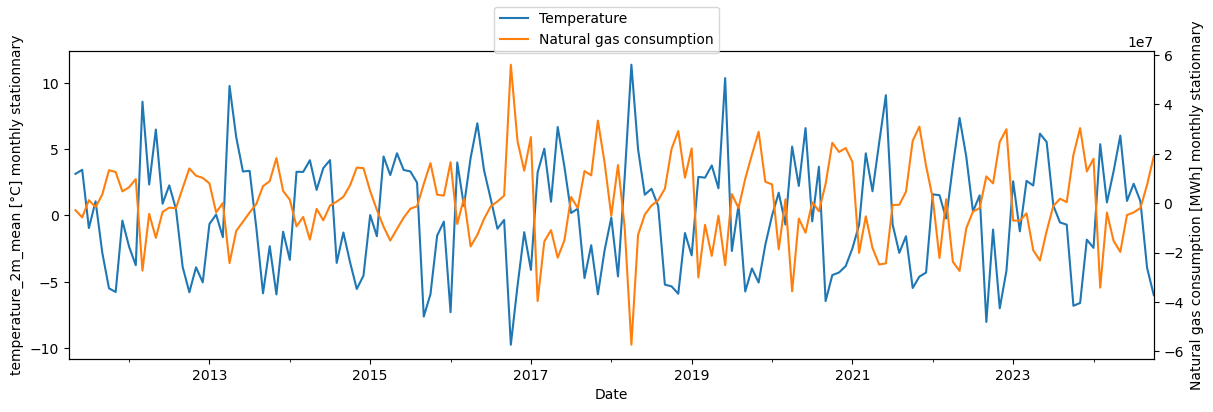

In [116]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()

# For both, only show data in 2021 and 2022
temp_2m_mean_monthly_st.plot(ax=ax1, color="tab:blue")
gas_consumption_monthly_st.plot(ax=ax2, color="tab:orange")

# Labels and legend
ax1.set_ylabel("temperature_2m_mean [°C] monthly stationnary")
ax2.set_ylabel("Natural gas consumption [MWh] monthly stationnary")

# Legend for both plots in one
fig.legend(
    labels=["Temperature", "Natural gas consumption"],

    loc="upper center",
)

# Create directory if it does not exist
os.makedirs("diagrams", exist_ok=True)

# Save plot
fig.savefig("diagrams/temp_conso_monthly_stationnary.svg", format="svg", bbox_inches="tight")

In [117]:
gas_consumption_monthly_st.corr(temp_2m_mean_monthly_st)

-0.8605553305766885

## Linear Regression

In [138]:
train_size = 0.8  # 80% pour l'entraînement, 20% pour le test
train, test = train_test_split(pd.concat([gas_consumption_monthly, temp_2m_mean_monthly,sunshine_dur_monthly,wind_speed_10m_max_monthly], axis=1), 
                               test_size=1-train_size, shuffle=False)

X_test = test['temperature_2m_mean (°C)'].values.reshape(-1, 1)
y_test = test['consumption'].values



X_train = train['temperature_2m_mean (°C)'].values.reshape(-1, 1)  # Température comme variable indépendante
y_train = train['consumption'].values  # Consommation de gaz comme cible

model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred = model.predict(X_test)

# Calcul de la MSE pour cette régression
mse = mean_squared_error(y_test, y_pred)
print(f'MSE (temp_2m_mean_monthly -> gas_consumption_monthly): {mse}')
r2 = model.score(X_test, y_test)
print(f'R^2 (temp_2m_mean_monthly -> gas_consumption_monthly): {r2}')


MSE (temp_2m_mean_monthly -> gas_consumption_monthly): 127378807983273.97
R^2 (temp_2m_mean_monthly -> gas_consumption_monthly): 0.8139464071365637


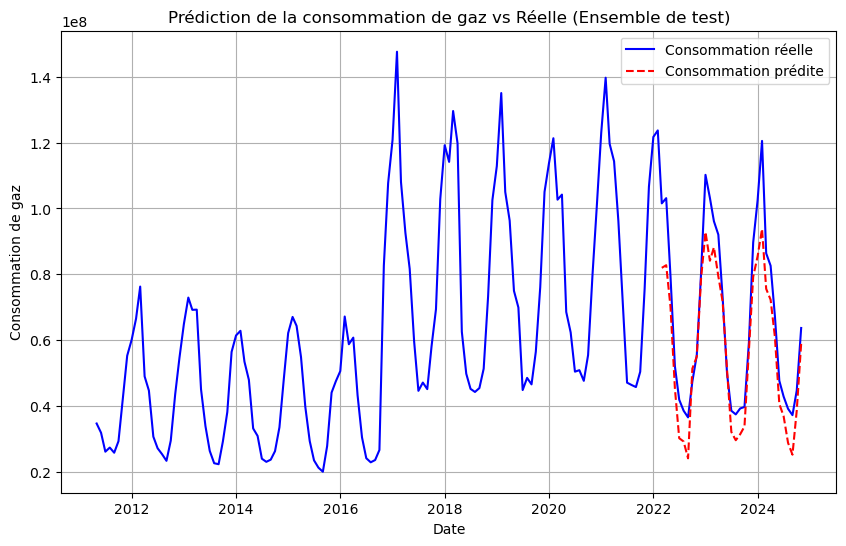

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(gas_consumption_monthly.index, gas_consumption_monthly, label='Consommation réelle', color='blue')
plt.plot(test.index, y_pred, label='Consommation prédite', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Consommation de gaz')
plt.title('Prédiction de la consommation de gaz vs Réelle (Ensemble de test)')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Regression

In [ ]:
# Sélectionner les variables indépendantes et dépendantes pour l'ensemble de test
X_test = test[['temperature_2m_mean (°C)', 'sunshine_dur_monthly', 'wind_speed_10m_max_monthly']].values
y_test = test['consumption'].values

# Sélectionner les variables indépendantes et dépendantes pour l'ensemble d'entraînement
X_train = train[['temperature_2m_mean (°C)', 'sunshine_dur_monthly', 'wind_speed_10m_max_monthly']].values
y_train = train['consumption'].values

# Initialiser le modèle de régression Ridge avec un paramètre alpha (force de régularisation)
model = Ridge(alpha=1.0)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs de consommation sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print(f'MSE (Ridge Regression): {mse}')

# Calculer le coefficient de détermination R^2 sur l'ensemble de test
r2 = r2_score(y_test, y_pred)
print(f'R^2 (Ridge Regression): {r2}')
